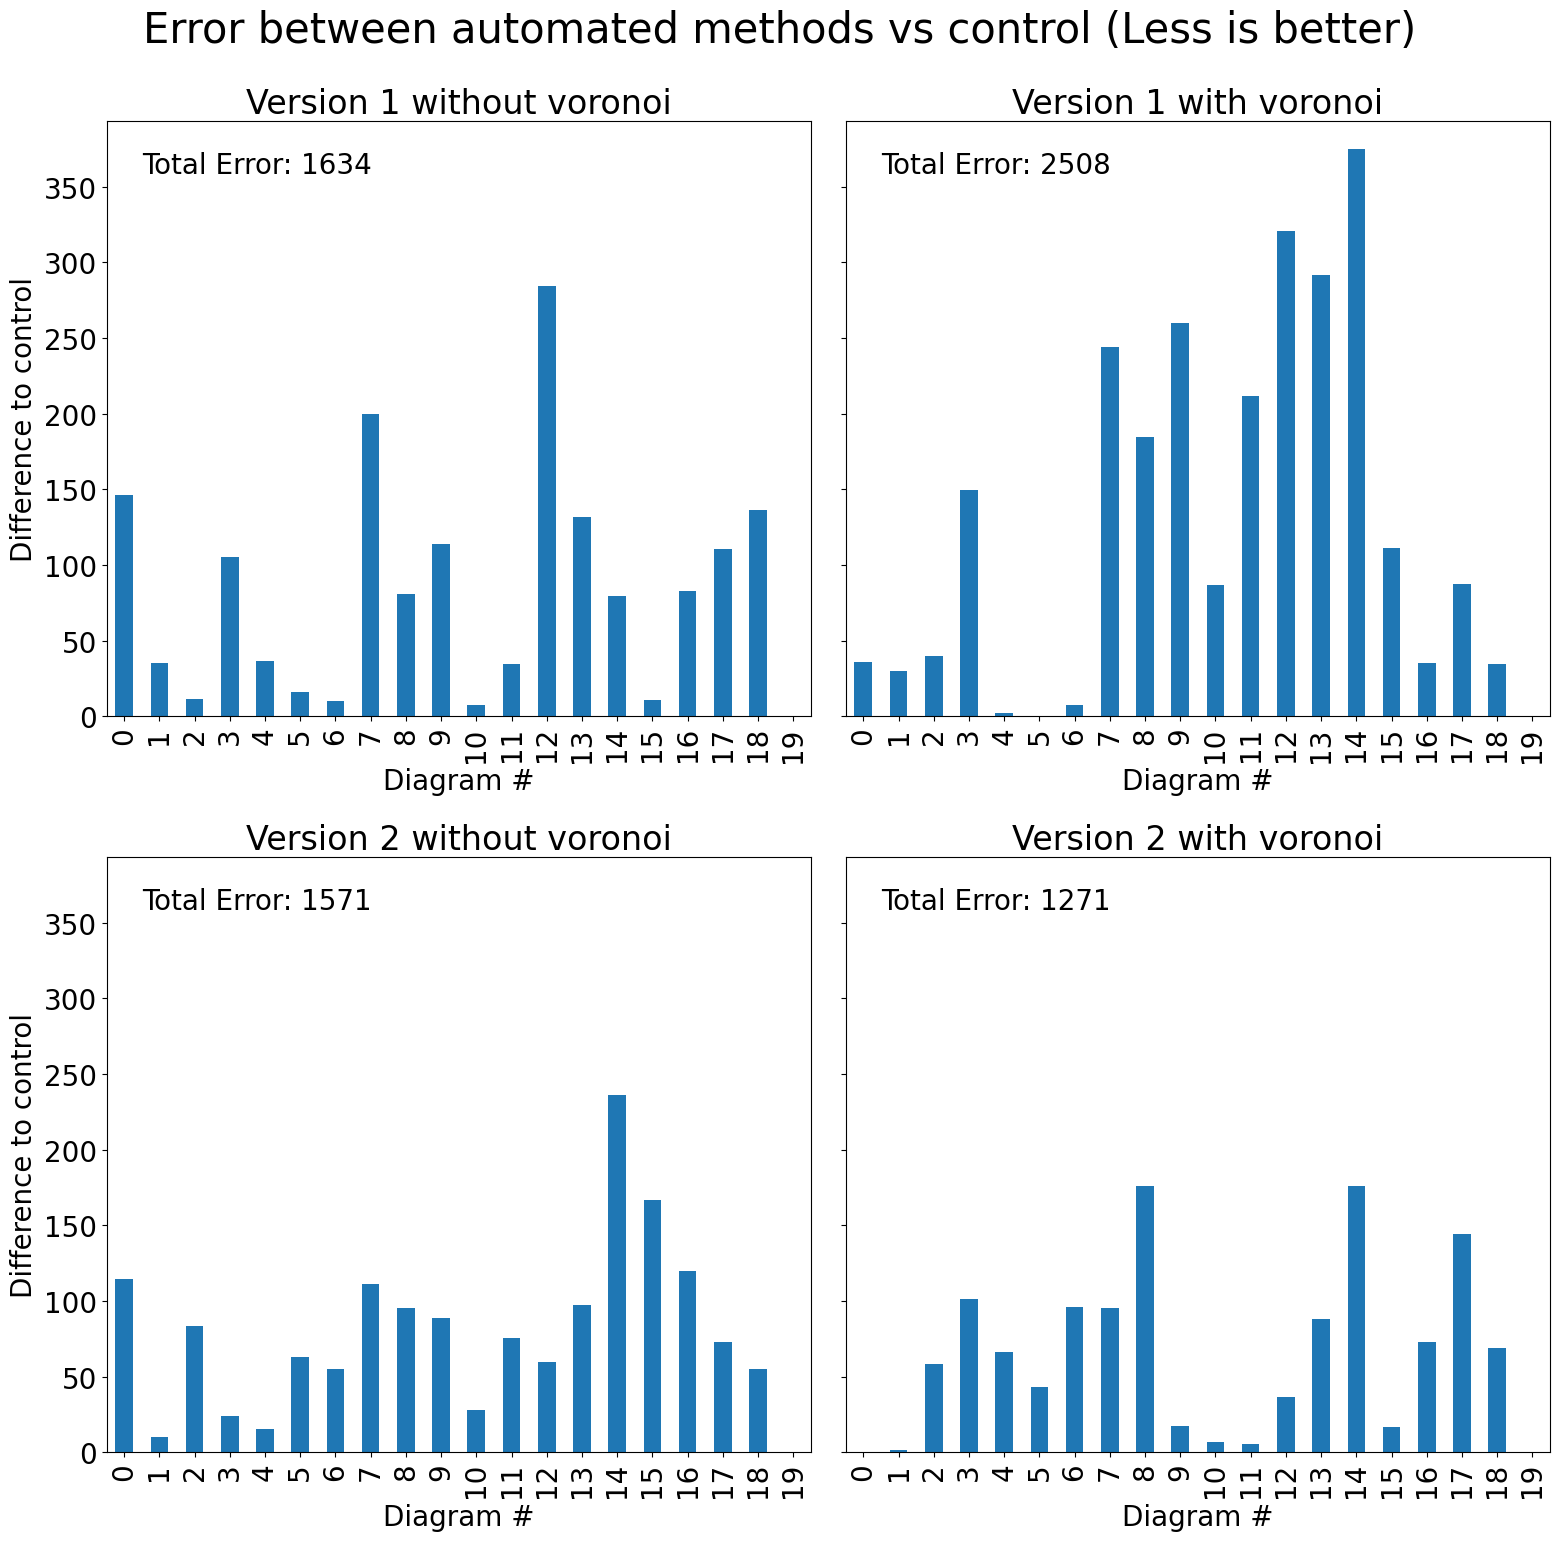

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('sample_numbers.csv')

method = 'distance'
baseline = f'hand {method} scaled'
keys = [f'v1 no voronoi {method} scaled', f'v1 voronoi {method} scaled', f'v2 no voronoi {method} scaled', f'v2 voronoi {method} scaled']

for key in keys:
    df[key + ' diff'] = (df[key] - df[baseline]).abs()

diffkeys = [key + ' diff' for key in keys]
errors = [(df[key].sum(), key) for key in diffkeys]

titles = ['Version 1 without voronoi', 'Version 1 with voronoi', 'Version 2 without voronoi', 'Version 2 with voronoi']

fig, axes = plt.subplots(2, 2, figsize=(16,16), sharey=True)
plt.rcParams.update({'font.size': 20})
for i, col in enumerate(diffkeys):
    axis = axes[i//2][i%2]
    df[col].plot(kind='bar', ax=axis, title=titles[i])
    axis.set_xlabel('Diagram #')
    if i%2 == 0:
        axis.set_ylabel('Difference to control')
    axis.text(0.05, 0.95, f'Total Error: {errors[i][0]:.0f}', transform=axis.transAxes, ha='left', va='top', fontsize=20)

plt.suptitle('Error between automated methods vs control (Less is better)', fontsize=30, y=0.97)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('Different method\'s vs hand done errors')
plt.show()
plt.close()
